# Time Series (시계열)

In [1]:
import numpy as np
import pandas as pd
np.random.seed(12345)
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(10, 6))
PREVIOUS_MAX_ROWS = pd.options.display.max_rows
pd.options.display.max_rows = 20
np.set_printoptions(precision=4, suppress=True)

In [2]:
data = pd.read_csv("data/tips.csv")

시계열 데이터는 금융, 경제, 생태학, 물리학 등 여러 다양한 분야에서 사용되는 매우 중요한 구조화된 데이터다.  
시간상의 여러 지점을 관측하거나 측정할 수 있는 모든 것이 시계열이다.

## Date and Time Data Types and Tools (날짜, 시간 자료형, 도구)
- 개요 : datetime 모듈에서 제공하는 클래스에 대해서 학습한다.

> __표 11-1__ datetime 모듈의 자료형

|자료형|설명|
|:-------|:---------------|
|date|그레고리안 달력을 사용해서 __날짜(연, 월, 일)__ 을 저장한다.|
|time|하루의 시간을 __시, 분, 초, 마이크로초__ 단위로 저장한다.|
|datetime|날짜와 시간을 저장한다.|
|timedelta|두 datetime 값 간의 차이(일, 초, 마이크로초)를 표현한다.|
|tzinfo|지역시간대를 저장하기 위한 기본 자료형|

__1) datetime.datetime()__
- 날짜와 시간을 반환(year, month, day, hour, minute, second, microsecond)
- 특히, 시간에서는 마이크로초(microsecond, 백만분의 1초)까지 표현한다. 

In [3]:
from datetime import datetime

# datetime.now()는 현재의 날짜 시간을 표현한다.
now = datetime.now()
now

datetime.datetime(2021, 8, 19, 16, 31, 27, 24654)

In [4]:
now.year, now.month, now.day

(2021, 8, 19)

__2) datetime.timedelta()__
- 두 datetime 객체 간의 시간적인 차이를 표현할 수 있다.

In [5]:
delta = datetime(2011, 1, 7) - datetime(2008, 6, 24, 8, 15)
delta

datetime.timedelta(days=926, seconds=56700)

In [6]:
delta.days

926

In [7]:
delta.seconds # 두 시간의 차이인 15시간 45분을 seconds로 환산

56700

timedelta의 단점은 날짜와 초 단위로만 연산을 할 수 있다는 점이다.  
이를 보완하기 위해 __dateutil 패키지는 월 단위의 계산을 지원하는 relativedelta 클래스__를 제공한다.

- timedelta를 더하거나 빼면 그만큼의 시간이 datetime 객체에 적용되어 새로운 객체를 만들 수 있다.

In [8]:
from datetime import timedelta

start = datetime(2011, 1, 7)

In [9]:
# 기준날짜에서 12일을 더한다.
start + timedelta(12)

datetime.datetime(2011, 1, 19, 0, 0)

In [10]:
# 기준날짜에서 2*12일을 빼준다.
start - 2 * timedelta(12)

datetime.datetime(2010, 12, 14, 0, 0)

### Converting Between String and Datetime (문자열을 datetime으로 변환하기)
- 개요 : datetime ↔ 문자열 변환에 대해서 이해한다.

__1) datetime → 문자열 변환__
- __str 메서드__나 __strftime 메서드__를 활용해 문자열로 나타낼 수 있다.

In [11]:
stamp = datetime(2011, 1, 3)
stamp

datetime.datetime(2011, 1, 3, 0, 0)

In [12]:
# str()
str(stamp)

'2011-01-03 00:00:00'

In [13]:
# strftime(), f는 format을 의미
stamp.strftime('%Y-%m-%d')

'2011-01-03'

__2) 문자열 → datetime__
- __datetime.strptime()__을 사용해 문자열을 날짜로 변환할 수 있다.

In [14]:
# strptime(), p는 parse를 의미
value = '2011-01-03'
datetime.strptime(value, '%Y-%m-%d') # YY-mm-dd 형태

datetime.datetime(2011, 1, 3, 0, 0)

In [15]:
datestrs = ['7/6/2011', '8/6/2011']
[datetime.strptime(x, '%m/%d/%Y') for x in datestrs]

[datetime.datetime(2011, 7, 6, 0, 0), datetime.datetime(2011, 8, 6, 0, 0)]

> __표 11-2__ Datetime 포맷 규칙

|자료형|설명|
|:-------|:---------------|
|%Y|4자리 연도|
|%y|2자리 연도|
|%m|2자리 월 [01,02,12]|
|%d|2자리 일 [01,10,31]|
|%H|시간(24시간 형식) [00,23]|
|%I|시간(12시간 형식) [01,12]|
|%M|2자리 분 [00, 59]|
|%S|초 [00,61] (60,61은 윤초)|
|%w|정수로 나타낸 요일 [0(일요일)]|
|%U|연중 주차 [00,53], 일요일을 그 주의 첫번째 날로 간주하고, 그 해에서 첫번째 일요일 앞에 있는 날은 0주차가 된다.|
|%W|연중 주차 [00,53], 월요일을 그 주의 첫번째 날로 간주하고, 그 해에서 첫번째 월요일 앞에 있는 날은 0주차가 된다.|
|%z|UTC 시간대 오프셋을 +HHMM 또는 -HHMM으로 표현한다. 만약 시간대를 신경 쓰지 않는다면 비워둔다.|
|%F|%Y-%m-%d 형식에 대한 축약(예: 2012-4-18)|
|%D|%m/%d/%y 형식에 대한 축약(예:04/18/12)|

- __parser.parse()__를 사용하면 위의 Datetime 포맷 규칙을 사용하지 않아도 편리하게 datetime으로 변환 할 수 있다.  

In [16]:
datetime.strptime('2011-01-03', '%Y-%m-%d')

datetime.datetime(2011, 1, 3, 0, 0)

In [17]:
from dateutil.parser import parse

parse('2011-01-03')

datetime.datetime(2011, 1, 3, 0, 0)

In [18]:
# 월/일이 연도보다 앞에 오는 경우
parse('Jan 31, 1997 10:45 PM')

datetime.datetime(1997, 1, 31, 22, 45)

In [19]:
# 일/월/연도 순서인 경우
parse('6/12/2011', dayfirst=True)

datetime.datetime(2011, 12, 6, 0, 0)

In [20]:
# dayfirst=True를 넣어주지 않으면 월/일 순으로 인식한다.
parse('6/12/2011')

datetime.datetime(2011, 6, 12, 0, 0)

- __to_datetime()__ 활용하기
  
pandas는 일반적으로 DataFrame의 컬럼이나 축 색인으로 날짜가 담긴 배열을 사용한다.  
to_datetime 메서드는 많은 종류의 날자 표현을 처리한다. ISO8001 같은 표준 날짜 형식은 매우 빠르게 처리 가능하다.

In [21]:
datestrs = ['2011-07-06 12:00:00', '2011-08-06 00:00:00']
pd.to_datetime(datestrs)

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00'], dtype='datetime64[ns]', freq=None)

In [22]:
# 누락된 값(None, 빈 문자열 등)으로 간주되어야 할 값도 처리해준다.
idx = pd.to_datetime(datestrs + [None])
idx

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00', 'NaT'], dtype='datetime64[ns]', freq=None)

In [23]:
# 2번째 DatetimeIndex 인덱싱
idx[2]  # NaT : Not a Time (pandas에서 누락된 타임스탬프 데이터를 나타낸다.)

NaT

In [24]:
# null값 확인
pd.isnull(idx)

array([False, False,  True])

----------------------------------------------

In [25]:
# 누락된 값이 아닌 다른 날짜를 넣고 더한다면?
temp = ['2021-06-04']

In [26]:
idx2 = pd.to_datetime(datestrs + temp)
idx2

DatetimeIndex(['2011-07-06 12:00:00', '2011-08-06 00:00:00',
               '2021-06-04 00:00:00'],
              dtype='datetime64[ns]', freq=None)

- __로케일에 맞는 다양한 포맷 옵션 제공__ : datetime 객체는 여러 나라 혹은 언어에서 사용하는 포맷에 맞게 날짜 포맷을 여러가지고 제공한다.

> __표 11-3__ 로케일별 날짜 포맷

|자료형|설명|
|:-------|:---------------|
|%a|축약된 요일 이름|
|%A|요일 이름|
|%b|축약된 월 이름|
|%B|월 이름|
|%c|전체 날짜와 시간(예: 'Tue 01 May 2012 04:20:57 PM')|
|%p|해당 로케일에서 AM/PM에 대응되는 이름(AM은 오전, PM은 오후)|
|%x|로케일에 맞는 날짜 형식|(예: 미국이라면 2012년 5월 1일은 '05/01/2012')
|%X|로케일에 만는 시간 형식(예: '04:24:12 PM')|

## Time Series Basics (시계열 기초)
pandas에서 찾아볼 수 있는 가장 기본적인 시계열 객체의 종류는 __파이썬 문자열__이나 datetime 객체로 표현되는 __타임스탬프로 색인된 Series__다.

In [27]:
from datetime import datetime

dates = [datetime(2011, 1, 2), datetime(2011, 1, 5),
         datetime(2011, 1, 7), datetime(2011, 1, 8),
         datetime(2011, 1, 10), datetime(2011, 1, 12)]
dates

[datetime.datetime(2011, 1, 2, 0, 0),
 datetime.datetime(2011, 1, 5, 0, 0),
 datetime.datetime(2011, 1, 7, 0, 0),
 datetime.datetime(2011, 1, 8, 0, 0),
 datetime.datetime(2011, 1, 10, 0, 0),
 datetime.datetime(2011, 1, 12, 0, 0)]

In [28]:
ts = pd.Series(np.random.randn(6), index=dates)  # random.randn 평균 0, 표준편차 1의 가우시안 분포 난수를 생성
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [29]:
ts.index

DatetimeIndex(['2011-01-02', '2011-01-05', '2011-01-07', '2011-01-08',
               '2011-01-10', '2011-01-12'],
              dtype='datetime64[ns]', freq=None)

In [30]:
# 서로 다르게 색인된 시계열 객체 간의 산술 연산은 자동으로 날짜에 맞춰진다.
ts + ts[::2]

2011-01-02   -0.409415
2011-01-05         NaN
2011-01-07   -1.038877
2011-01-08         NaN
2011-01-10    3.931561
2011-01-12         NaN
dtype: float64

In [31]:
ts[::2]

2011-01-02   -0.204708
2011-01-07   -0.519439
2011-01-10    1.965781
dtype: float64

In [32]:
# pandas는 Numpy의 datetime64 자료형을 사용해서 나노초의 정밀도를 가지는 타임스탬프를 저장한다.
ts.index.dtype

dtype('<M8[ns]')

In [33]:
# DatetimeIndex의 스칼라 값은 pandas의 Timestamp 객체다.
stamp = ts.index[0]
stamp

Timestamp('2011-01-02 00:00:00')

Timestamp는 datetime 객체를 사용하는 어떤 곳에도 대체 사용이 가능하다.  
게다가 가능하다면 빈도에 관한 정보도 저장하며, 시간대 변환을 하는 방법과 다른 종류의 조작을 하는 방법도 포함하고 있다.

### Indexing, Selection, Subsetting (색인, 선택, 부분 선택)

__1) Indexing__

- 시계열은 라벨에 기반해서 데이터를 선택하고 인덱싱할 때 pandas.Series와 동일하게 동작한다.

In [34]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [35]:
ts.index[2]

Timestamp('2011-01-07 00:00:00')

In [36]:
stamp = ts.index[2]

In [37]:
ts[stamp]

-0.5194387150567381

In [38]:
# ts.loc[ts.index[2]]

- 해석할 수 있는 날짜를 문자열로 넘겨서 편리하게 사용할 수 있다.

In [39]:
ts['1/10/2011']

1.9657805725027142

In [40]:
ts['20110110']

1.9657805725027142

__2) Selection__

- 긴 시계열에서는 연을 넘기거나, 연, 월만 넘겨서 데이터의 일부 구간만 선택할 수도 있다.

In [41]:
longer_ts = pd.Series(np.random.randn(1000),
                      index=pd.date_range('1/1/2000', periods=1000))  # pd.date_range

In [42]:
longer_ts

2000-01-01    0.092908
2000-01-02    0.281746
2000-01-03    0.769023
2000-01-04    1.246435
2000-01-05    1.007189
                ...   
2002-09-22    0.930944
2002-09-23   -0.811676
2002-09-24   -1.830156
2002-09-25   -0.138730
2002-09-26    0.334088
Freq: D, Length: 1000, dtype: float64

문자열 '2001'은 연도로 해석되어 해당 기간의 데이터를 선택한다.

In [43]:
# 2001년도 데이터만 불러오기
longer_ts['2001']

2001-01-01    1.599534
2001-01-02    0.474071
2001-01-03    0.151326
2001-01-04   -0.542173
2001-01-05   -0.475496
                ...   
2001-12-27    0.057874
2001-12-28   -0.433739
2001-12-29    0.092698
2001-12-30   -1.397820
2001-12-31    1.457823
Freq: D, Length: 365, dtype: float64

연도와 월을 포함해서 데이터를 선택한다.

In [44]:
# 2001년 5월 데이터 불러오기
longer_ts['2001-05']

2001-05-01   -0.622547
2001-05-02    0.936289
2001-05-03    0.750018
2001-05-04   -0.056715
2001-05-05    2.300675
                ...   
2001-05-27    0.235477
2001-05-28    0.111835
2001-05-29   -1.251504
2001-05-30   -2.949343
2001-05-31    0.634634
Freq: D, Length: 31, dtype: float64

__3) Slicing__
- datetime 객체로 데이터를 잘라내는 작업은 일반적인 Series와 동일한 방식으로 할 수 있다.

In [45]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [46]:
ts[datetime(2011, 1, 7):]

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

- 대부분의 시계열 데이터는 연대순으로 정렬되기 때문에 범위를 지정하기 위해 시계열에 포함하지 않고 타임스탬프를 이용해서 Series를 나눌 수 있다.

In [47]:
ts['1/6/2011':'1/11/2011']

2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
dtype: float64

__4) Truncation__

In [48]:
# truncate() : TimeSeries를 두 개의 날짜로 나눈다
# truncate(after='기준날짜') : 기준날짜보다 크거나 같은(>=) 날짜를 잘라낸다.
ts.truncate(after='1/9/2011')

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
dtype: float64

In [49]:
# truncate(before='기준날짜') : 기준날짜보다 작거나 같은(<=) 날짜를 잘라낸다.
ts.truncate(before='1/8/2011')

2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

- DataFrame에도 동일하게 적용되며 로우에 인덱싱 된다.

In [50]:
dates = pd.date_range('1/1/2000', periods=100, freq='W-WED')  # freq = 매주 수요일
long_df = pd.DataFrame(np.random.randn(100, 4),
                       index=dates,
                       columns=['Colorado', 'Texas',
                                'New York', 'Ohio'])

In [51]:
long_df.head()

,Colorado,Texas,New York,Ohio
2000-01-05,0.488675,-0.178098,2.122315,0.061192
2000-01-12,0.884111,-0.608506,-0.072052,0.544066
2000-01-19,0.323886,-1.683325,0.526860,1.858791
2000-01-26,-0.548419,-0.279397,-0.021299,-0.287990
2000-02-02,0.089175,0.522858,0.572796,-1.760372


In [52]:
long_df.loc['5-2001']

,Colorado,Texas,New York,Ohio
2001-05-02,-0.006045,0.490094,-0.277186,-0.707213
2001-05-09,-0.560107,2.735527,0.927335,1.513906
2001-05-16,0.538600,1.273768,0.667876,-0.969206
2001-05-23,1.676091,-0.817649,0.050188,1.951312
2001-05-30,3.260383,0.963301,1.201206,-1.852001


> __Review__

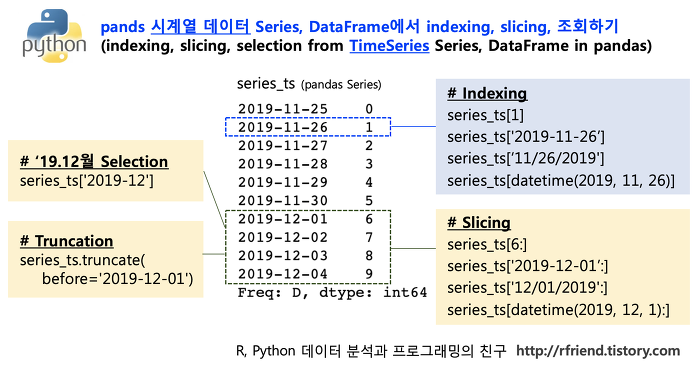

### Time Series with Duplicate Indices (중복된 색인을 갖는 시계열)

- 특정 타임스탬프에 데이터가 몰려 있는 경우를 발견할 수 있다.

In [53]:
dates = pd.DatetimeIndex(['1/1/2000', '1/2/2000', '1/2/2000',
                          '1/2/2000', '1/3/2000'])
dates

DatetimeIndex(['2000-01-01', '2000-01-02', '2000-01-02', '2000-01-02',
               '2000-01-03'],
              dtype='datetime64[ns]', freq=None)

In [54]:
dup_ts = pd.Series(np.arange(5), index=dates)
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [55]:
# is_unique 속성을 통해 확인해보면 속성이 유일하지 않음(=중복됨)을 알 수 있다.
# True가 나오려면 타임스탬프 데이터가 모두 달라야 함
dup_ts.index.is_unique

False

- 데이터를 인덱싱해보면 타임스탬프의 중복 여부에 따라 스칼라 값이나 슬라이스가 생성된다.

In [56]:
dup_ts['1/3/2000']  # not duplicated

4

In [57]:
dup_ts['1/2/2000']  # duplicated

2000-01-02    1
2000-01-02    2
2000-01-02    3
dtype: int32

- 중복되는 타임스탬프를 가지는 데이터를 집계하는 한 가지 방법은 __groupby에 level=0(단일 단계 인덱싱)__을 넘기는 것이다.

> __groupby(level=0) 이해하기__

In [58]:
# pd.DataFrame.groupby(by='컬럼명')의 형태를 많이 본다.

# groupby(level=int or 'level_name')
# If the axis is a MultiIndex (hierarchical), group by a particular level or levels.

# 멀티인덱스를 가지는 DataFrame 예제 생성
exam = pd.DataFrame([71,84,93,79,95,77], index=[['남성','남성','남성','여성','여성','여성'], ['국어','영어','수학','국어','영어','수학']])
exam.columns = ['성적']
exam

성적
남성 국어  71
   영어  84
   수학  93
여성 국어  79
   영어  95
   수학  77

In [59]:
mul_index = exam.groupby(level=0)

In [60]:
mul_index.mean()

,성적
남성,82.666667
여성,83.666667


In [61]:
mul_index.count()

,성적
남성,3
여성,3


In [62]:
mul_index = exam.groupby(level=1)

In [63]:
mul_index.mean()

,성적
국어,75.0
수학,85.0
영어,89.5


In [64]:
mul_index.count()

,성적
국어,2
수학,2
영어,2


-------------------

In [65]:
dup_ts

2000-01-01    0
2000-01-02    1
2000-01-02    2
2000-01-02    3
2000-01-03    4
dtype: int32

In [66]:
grouped = dup_ts.groupby(level=0)  

In [67]:
grouped.mean()

2000-01-01    0
2000-01-02    2
2000-01-03    4
dtype: int32

In [68]:
grouped.count()

2000-01-01    1
2000-01-02    3
2000-01-03    1
dtype: int64

## Date Ranges, Frequencies, and Shifting (날짜 범위, 빈도, 이동)

pandas에서 일반적인 시계열은 불규칙적인 것으로 간주된다. 즉, 고정된 빈도를 갖지 않는다.  
  
대부분의 애플리케이션에서 이는 충분하다. 하지만 시계열 안에서 누락된 값이 발생할지라도 일별, 월별 혹은 매 15분 같은 상대적인 고정 빈도에서의 작업이 요구되는 경우가 종종 있다.  
  
다행스럽게도 pandas에는 리샘플링, 표준 시계열 빈도 모음, 빈도 추론 그리고 고정된 빈도의 날짜 범위를 위한 도구가 있다.  
  
예를 들어 아래 예제 시계열을 고정된 일 빈도로 변환하려면 resample 메서드를 사용하면 된다.

In [69]:
ts

2011-01-02   -0.204708
2011-01-05    0.478943
2011-01-07   -0.519439
2011-01-08   -0.555730
2011-01-10    1.965781
2011-01-12    1.393406
dtype: float64

In [70]:
resampler = ts.resample('D')  # 문자열 'D'는 일 빈도로 해석된다.
resampler

빈도 간 변환이나 리샘플링은 11.6절에서 다룰 예정이다.

### Generating Date Ranges (날짜 범위 생성하기)

- date_range()는 __기본적으로 일별 타임스탬프__를 생성한다.  

In [71]:
# pd.date_range
# 특정 빈도에 따라 지정한 길이만큼의 DatetimeIndex를 생성한다.
# https://pandas.pydata.org/docs/reference/api/pandas.date_range.html

index = pd.date_range('2012-04-01', '2012-06-01')  # 시작날짜와 종료날짜를 모두 지정해주었다.
index

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20',
               '2012-04-21', '2012-04-22', '2012-04-23', '2012-04-24',
               '2012-04-25', '2012-04-26', '2012-04-27', '2012-04-28',
               '2012-04-29', '2012-04-30', '2012-05-01', '2012-05-02',
               '2012-05-03', '2012-05-04', '2012-05-05', '2012-05-06',
               '2012-05-07', '2012-05-08', '2012-05-09', '2012-05-10',
               '2012-05-11', '2012-05-12', '2012-05-13', '2012-05-14',
               '2012-05-15', '2012-05-16', '2012-05-17', '2012-05-18',
               '2012-05-19', '2012-05-20', '2012-05-21', '2012-05-22',
               '2012-05-23', '2012-05-24', '2012-05-25', '2012-05-26',
      

- 만약 시작날짜나 종료날짜만 지정할 경우, __생성하려고 하는 기간의 숫자도 지정__해줘야 한다.

In [72]:
# start : str or datetime-like, periods : int
pd.date_range(start='2012-04-01', periods=20)

DatetimeIndex(['2012-04-01', '2012-04-02', '2012-04-03', '2012-04-04',
               '2012-04-05', '2012-04-06', '2012-04-07', '2012-04-08',
               '2012-04-09', '2012-04-10', '2012-04-11', '2012-04-12',
               '2012-04-13', '2012-04-14', '2012-04-15', '2012-04-16',
               '2012-04-17', '2012-04-18', '2012-04-19', '2012-04-20'],
              dtype='datetime64[ns]', freq='D')

In [73]:
# end : str or datetime-like
pd.date_range(end='2012-06-01', periods=20)

DatetimeIndex(['2012-05-13', '2012-05-14', '2012-05-15', '2012-05-16',
               '2012-05-17', '2012-05-18', '2012-05-19', '2012-05-20',
               '2012-05-21', '2012-05-22', '2012-05-23', '2012-05-24',
               '2012-05-25', '2012-05-26', '2012-05-27', '2012-05-28',
               '2012-05-29', '2012-05-30', '2012-05-31', '2012-06-01'],
              dtype='datetime64[ns]', freq='D')

In [74]:
# BM(Business Month End, 월 영업마감일)
pd.date_range('2000-01-01', '2000-12-01', freq='BM')

DatetimeIndex(['2000-01-31', '2000-02-29', '2000-03-31', '2000-04-28',
               '2000-05-31', '2000-06-30', '2000-07-31', '2000-08-31',
               '2000-09-29', '2000-10-31', '2000-11-30'],
              dtype='datetime64[ns]', freq='BM')

> __표 11-4__ 기본 시계열 빈도 (P.438)

|축약|설명|
|:-------|:---------------|
|s|초|
|T|분|
|H|시간|
|D|일(day)|
|B|주말이 아닌 평일|
|W|주(일요일)|
|W-MON|주(월요일)|
|M|각 달(month)의 마지막 날|
|MS|각 달의 첫날|
|BM|주말이 아닌 평일 중에서 각 달의 마지막 날|
|BMS|주말이 아닌 평일 중에서 각 달의 첫날|
|WOM-2THU|각 달의 두번째 목요일|
|Q-JAN|각 분기의 첫달의 마지막 날|
|Q-DEC|각 분기의 마지막 달의 마지막 날|

- date_range()는 기본적으로 시작시간이나 종료시간의 타임스탬프가 존재할 경우 이를 시간을 보존한다.

In [75]:
# 시간대 고정
pd.date_range('2012-05-02 12:56:31', periods=5)

DatetimeIndex(['2012-05-02 12:56:31', '2012-05-03 12:56:31',
               '2012-05-04 12:56:31', '2012-05-05 12:56:31',
               '2012-05-06 12:56:31'],
              dtype='datetime64[ns]', freq='D')

- 시작시간이나 종료시간을 가지고 있는 타임스탬프를 자정으로 맞추어 정규화하고 싶을 때 __normalize 옵션__을 사용한다.

In [76]:
# normalize : Ture or False
# start/end dates to midnight before generating date range.

pd.date_range('2012-05-02 12:56:31', periods=5, normalize=True)

DatetimeIndex(['2012-05-02', '2012-05-03', '2012-05-04', '2012-05-05',
               '2012-05-06'],
              dtype='datetime64[ns]', freq='D')

### Frequencies and Date Offsets (빈도와 날짜 오프셋)

pandas에서 빈도는 __기본 빈도(Base frequency)__와 배수의 조합으로 이루어진다. 

기본 빈도는 보통 'M'(월별), 'H'(시간별)처럼 짧은 문자열로 참조된다. 

각 기본 빈도에는 일반적으로 __날짜 오프셋(Date offset)__이라고 불리는 객체를 사용할 수 있다.  
예를 들어 시간별 빈도는 Hour 클래스를 사용해서 표현할 수 있다.

In [77]:
from pandas.tseries.offsets import Hour, Minute

hour = Hour()  # 날짜 오프셋 객체, ex) 시간 = Hour()
hour

<Hour>

In [78]:
# 이 오프셋의 곱은 정수를 넘겨서 구할 수 있다.
four_hours = Hour(4)
four_hours #  4(배수) * 기본 빈도(Hours)

<4 * Hours>

이런 객체들을 직접 만들어야 할 경우는 절대 없겠지만, 대신 'H' 또는 '4H'처럼 문자열로 표현하게 될 것이다.  
기본 빈도 앞에 정수를 두면 해당 빈도의 곱을 생성한다.

In [79]:
pd.date_range('2000-01-01', '2000-01-03 23:59', freq='4h')  # freq(빈도)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [80]:
# 동일한 결과(freq=four_hours)
pd.date_range('2000-01-01', '2000-01-03 23:59', freq=four_hours)

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 04:00:00',
               '2000-01-01 08:00:00', '2000-01-01 12:00:00',
               '2000-01-01 16:00:00', '2000-01-01 20:00:00',
               '2000-01-02 00:00:00', '2000-01-02 04:00:00',
               '2000-01-02 08:00:00', '2000-01-02 12:00:00',
               '2000-01-02 16:00:00', '2000-01-02 20:00:00',
               '2000-01-03 00:00:00', '2000-01-03 04:00:00',
               '2000-01-03 08:00:00', '2000-01-03 12:00:00',
               '2000-01-03 16:00:00', '2000-01-03 20:00:00'],
              dtype='datetime64[ns]', freq='4H')

In [81]:
# 여러 오프셋을 덧셈으로 합칠 수 있다.
Hour(2) + Minute(30)

<150 * Minutes>

In [82]:
# 유사하게 빈도 문자열로 '1m30min'을 사용해도 같은 표현으로 잘 동작한다.
pd.date_range('2000-01-01', periods=10, freq='1h30min')

DatetimeIndex(['2000-01-01 00:00:00', '2000-01-01 01:30:00',
               '2000-01-01 03:00:00', '2000-01-01 04:30:00',
               '2000-01-01 06:00:00', '2000-01-01 07:30:00',
               '2000-01-01 09:00:00', '2000-01-01 10:30:00',
               '2000-01-01 12:00:00', '2000-01-01 13:30:00'],
              dtype='datetime64[ns]', freq='90T')

어떤 빈도는 시간상에서 균일하게 자리 잡고 있지 않은 경우도 있다.  
예를 들어 'M'(월 마지막일)은 월중 일수에 의존적이며, 'BM'(월 영업마감일)은 월말이 주말인지 아닌지에 따라 다르다.  
이를 표현할 수 있는 적당한 용어가 없어서 나는 이를 앵커드 오프셋(Anchored offset)이라 부른다.

#### Week of month dates (월별 주차)

한 가지 유용한 빈도 클래스는 __WOM__으로 시작하는 '월별 주차'이다.  
월별 주차를 사용하면 __매월 N주차 O요일의 날짜를 반복적으로 구할 수 있다.__

In [83]:
# 월별 3주차
rng = pd.date_range('2012-01-01', '2012-09-01', freq='WOM-3FRI')

In [84]:
list(rng)

[Timestamp('2012-01-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-02-17 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-03-16 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-04-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-05-18 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-06-15 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-07-20 00:00:00', freq='WOM-3FRI'),
 Timestamp('2012-08-17 00:00:00', freq='WOM-3FRI')]

### Shifting (Leading and Lagging) Data (데이터 시프트)

시프트는 데이터를 시간 축에서 앞이나 뒤로 이동하는 것을 의미한다.  
Series와 DataFrame은 색인은 변경하지 않고 데이터를 앞이나 뒤로 느슨한 시프트를 수행하는 shift 메서드를 가지고 있다.

In [85]:
ts = pd.Series(np.random.randn(4),
               index=pd.date_range('1/1/2000', periods=4, freq='M'))
ts

2000-01-31   -0.066748
2000-02-29    0.838639
2000-03-31   -0.117388
2000-04-30   -0.517795
Freq: M, dtype: float64

In [86]:
ts.shift(2)  # shift 메서드를 사용하면 인자만큼 이동(+,- 방향 모두 이동 가능)

2000-01-31         NaN
2000-02-29         NaN
2000-03-31   -0.066748
2000-04-30    0.838639
Freq: M, dtype: float64

In [87]:
ts.shift(-2)

2000-01-31   -0.117388
2000-02-29   -0.517795
2000-03-31         NaN
2000-04-30         NaN
Freq: M, dtype: float64

이렇게 shift를 하게 되면 시계열의 시작이나 끝에 결측치가 발생하게 된다.

shift는 일반적으로 한 시계열 내에서, 혹은 DataFrame의 컬럼으로 표현할 수 있는 여러 시계열에서의 퍼센트 변화를 계산할 때 흔히 사용한다.


> 시계열 내에서의 퍼센트 변화 계산식(증감율 계산)  
> __ts / ts.shift(1) - 1__

In [88]:
# 일별 삼성전자 주가
temp = pd.Series([83000, 85000, 80000, 79000],
               index=pd.date_range('1/1/2000', periods=4, freq='D'))
temp

2000-01-01    83000
2000-01-02    85000
2000-01-03    80000
2000-01-04    79000
Freq: D, dtype: int64

In [89]:
# 일별 삼성전자 주가 변화(% 계산)
temp / temp.shift(1) - 1

2000-01-01         NaN
2000-01-02    0.024096
2000-01-03   -0.058824
2000-01-04   -0.012500
Freq: D, dtype: float64

느슨한 시프트는 색인을 바꾸지 않기 때문에 어떤 데이터는 버려지기도 한다.  
그래서 만약 빈도를 알고 있다면 shift에 빈도를 넘겨서 타임스탬프가 확장되도록 할 수 있다.

In [90]:
ts.shift(2, freq='M')

2000-03-31   -0.066748
2000-04-30    0.838639
2000-05-31   -0.117388
2000-06-30   -0.517795
Freq: M, dtype: float64

In [91]:
ts.shift(3, freq='D')

2000-02-03   -0.066748
2000-03-03    0.838639
2000-04-03   -0.117388
2000-05-03   -0.517795
dtype: float64

In [92]:
ts.shift(1, freq='90T')  # 90T : 90분

2000-01-31 01:30:00   -0.066748
2000-02-29 01:30:00    0.838639
2000-03-31 01:30:00   -0.117388
2000-04-30 01:30:00   -0.517795
dtype: float64

#### Shifting dates with offsets (오프셋만큼 날짜 시프트하기)

pandas의 날짜 오프셋은 datetime이나 Timestamp 객체에서도 사용할 수 있다.

In [93]:
from pandas.tseries.offsets import Day, MonthEnd

now = datetime(2011, 11, 17)
now + 3 * Day()

Timestamp('2011-11-20 00:00:00')

만약 MonthEnd와 같은 앵커드 오프셋을 추가한다면 빈도 규칙의 다음 날짜로 rollforward 된다.

In [94]:
now + MonthEnd()

Timestamp('2011-11-30 00:00:00')

In [95]:
now + MonthEnd(2)

Timestamp('2011-12-31 00:00:00')

앵커드 오프셋은 rollforward와 rollback 메서드를 사용해서 명시적으로 각각 날짜를 앞으로 밀거나 뒤로 당길 수 있다.

In [96]:
offset = MonthEnd()

In [97]:
offset.rollforward(now)

Timestamp('2011-11-30 00:00:00')

In [98]:
offset.rollback(now)

Timestamp('2011-10-31 00:00:00')

이 메서드를 groupby와 함께 사용하면 날짜 오프셋을 영리하게 사용할 수 있다.

In [99]:
ts = pd.Series(np.random.randn(20),
               index=pd.date_range('1/15/2000', periods=20, freq='4d'))
ts

2000-01-15   -0.116696
2000-01-19    2.389645
2000-01-23   -0.932454
2000-01-27   -0.229331
2000-01-31   -1.140330
2000-02-04    0.439920
2000-02-08   -0.823758
2000-02-12   -0.520930
2000-02-16    0.350282
2000-02-20    0.204395
2000-02-24    0.133445
2000-02-28    0.327905
2000-03-03    0.072153
2000-03-07    0.131678
2000-03-11   -1.297459
2000-03-15    0.997747
2000-03-19    0.870955
2000-03-23   -0.991253
2000-03-27    0.151699
2000-03-31    1.266151
Freq: 4D, dtype: float64

In [100]:
ts.groupby(offset.rollforward).mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
dtype: float64

In [101]:
# resample을 사용하면 동일한 결과값을 구할 수 있다.
ts.resample('M').mean()

2000-01-31   -0.005833
2000-02-29    0.015894
2000-03-31    0.150209
Freq: M, dtype: float64